# Investigating datetime formats in 2017 and 2018 Bikeshare Trip Data
alcthach@gmail.com  
2022-09-22

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('/home/athach/work/projects/bikeshare/data/processed/start_time_exploded_202209221236.csv')
df2 = pd.read_csv('/home/athach/work/projects/bikeshare/data/processed/_SELECT_FROM_SELECT_FROM_SELECT_DISTINCT_ON_start_time_substring_202209222157.csv')

In [5]:
df

,trip_id,start_time_substring1,start_time_substring2
0,1000296,13,5
1,1001894,14,5
2,1006891,15,5
3,1008236,16,5
4,1016533,17,5
...,...,...,...
469,950570,28,4
470,954205,29,4
471,959153,1,5
472,959465,30,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   trip_id                474 non-null    int64
 1   start_time_substring1  474 non-null    int64
 2   start_time_substring2  474 non-null    int64
dtypes: int64(3)
memory usage: 11.2 KB


In [7]:
processed_df = df.sort_values('trip_id')

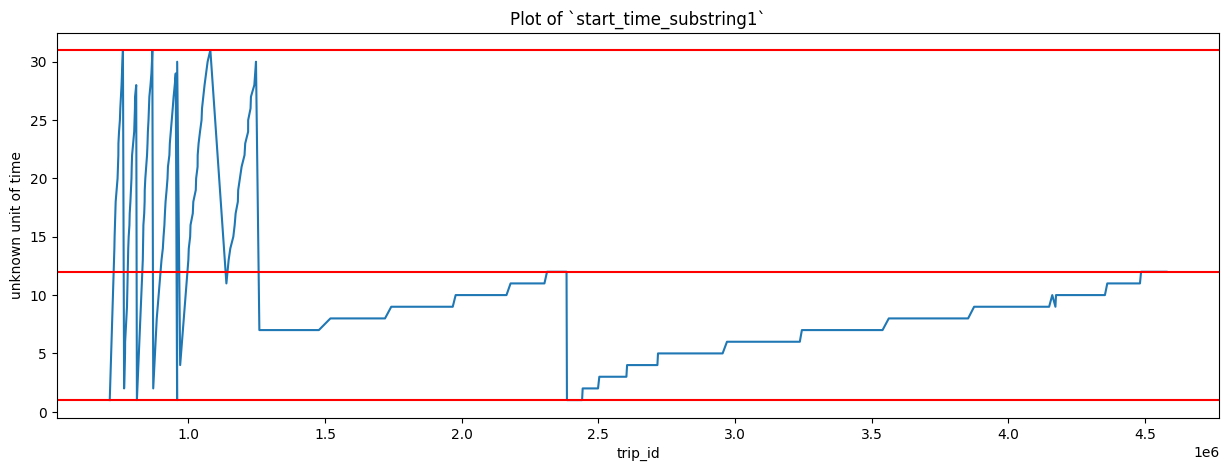

In [8]:
plt.figure(figsize=(15,5))
plt.plot(processed_df['trip_id'], processed_df['start_time_substring1'])
plt.axhline(y=31, color='red', label="31")
plt.axhline(y=1, color='red', label="1")
plt.axhline(y=12, color='red', label="1")
plt.title("Plot of `start_time_substring1`")
plt.xlabel("trip_id")
plt.ylabel("unknown unit of time")
plt.show()

- `start_time_substring1` takes on values up up to 31, however at about 1.2e6 there seems to be a switch
- The trend line looks step-wise which seems to suggest that maybe the column takes on month rather than day values
- That dip just before 2.5 1e6 makes sense, Re: From December, the 12th month to January, the 1st month
- Between 4.0 1e6 and 4.5 1e6 there looks like there might be an issue with the data format
- Instead of a step-wise movement to the next month, it looks like the data has 10th month, back down to month 9 then back up to month 10; no too sure what's going on but it looks like I'll need to investigate further
- I just thought of an idea, maybe I could use some logic here
- Something like, if substring1 > 12 then swap the value or add to a new column that shows the revised values
- Building on that...
``` pseudocode
  If trip_id < id of trip with the proper data format:
      take substring_1 and write to column called day
      take substring_2 and write to column called month
  elif trip_id > id of trip with trip proper data format:
      take substring_1 and write to column called month
      take substring_2 and write to column called day
```    

- The logic behind this is that I retain the original values
- In addition, I ensure the data is correct so that I can import it into the destination

- What would the relationship between the substrings be?

- This would be something like compare substring_1 again substring_2 as long as the year is still the same

```
iterate through the list of trips from smallest to largest
if 
```
---

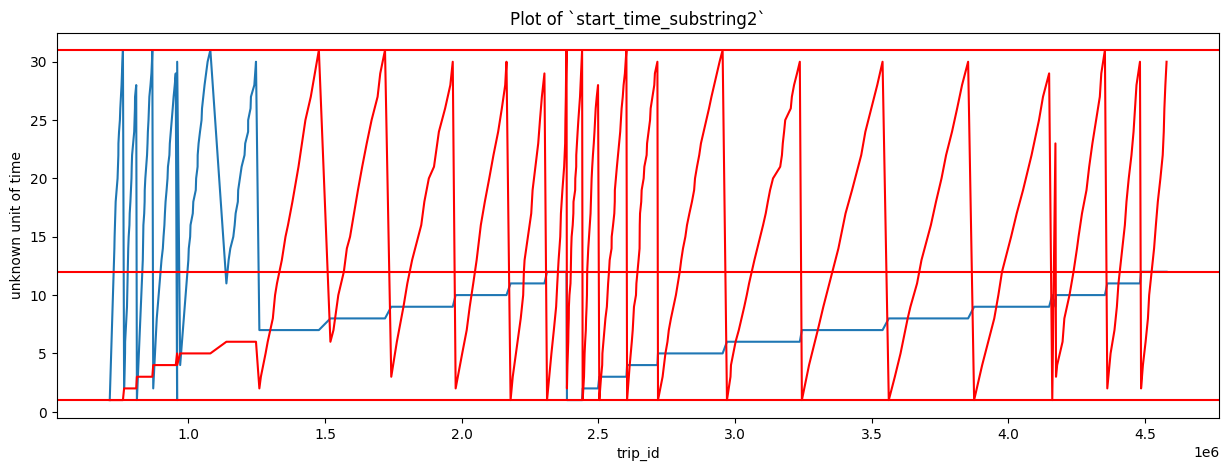

In [9]:
plt.figure(figsize=(15,5))
plt.plot(processed_df['trip_id'], processed_df['start_time_substring1'])
plt.plot(processed_df['trip_id'], processed_df['start_time_substring2'], color='red')
plt.axhline(y=31, color='red', label="31")
plt.axhline(y=1, color='red', label="1")
plt.axhline(y=12, color='red', label="1")
plt.title("Plot of `start_time_substring2`")
plt.xlabel("trip_id")
plt.ylabel("unknown unit of time")
plt.show()

- The opposite occurs when `start_time_substring2` is plotted
- Would appear that up until ~trip_id = 1.25^16e this column represents month value rather than day
- After that the steep climbs suggest that the column takes on day values, cycling between 1 and 31

> TODO: Identify where the date format switches
- Would make sense to transform from DD/MM/YYYY to MM/DD/YYYY
- Re: It would cost less this way because the proportion of DD/MM/YYYY is less than MM/DD/YYYY
- Remembering that I'm only pulled distinct values from the main dataset
- This means I would be performing this operation on millions of rows potentially...

In [12]:
processed_df2 = df2.sort_values('trip_id')

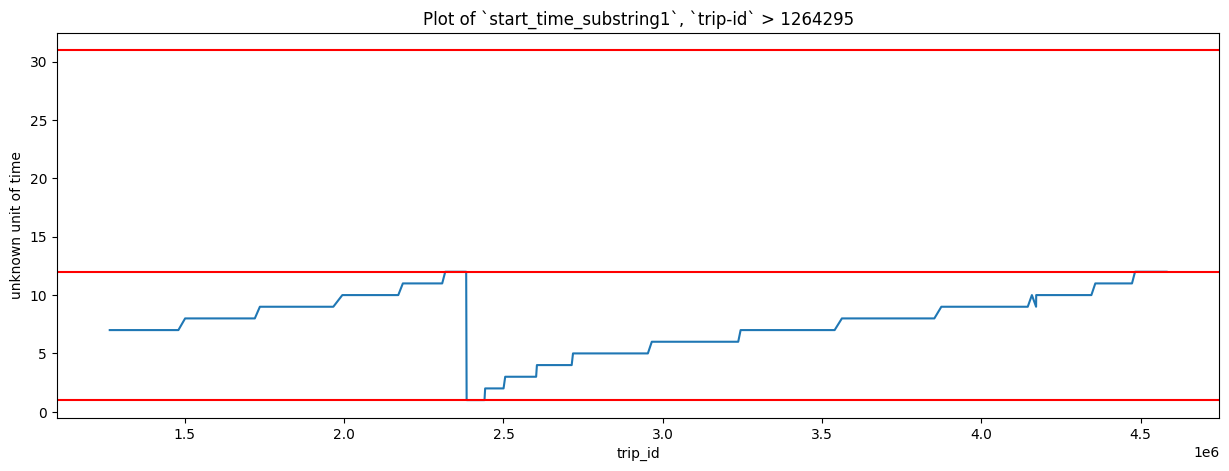

In [18]:
plt.figure(figsize=(15,5))
plt.plot(processed_df2['trip_id'], processed_df2['start_time_substring1'])
plt.axhline(y=31, color='red', label="31")
plt.axhline(y=1, color='red', label="1")
plt.axhline(y=12, color='red', label="1")
plt.title("Plot of `start_time_substring1`, `trip-id` > 1264295")
plt.xlabel("trip_id")
plt.ylabel("unknown unit of time")
plt.show()

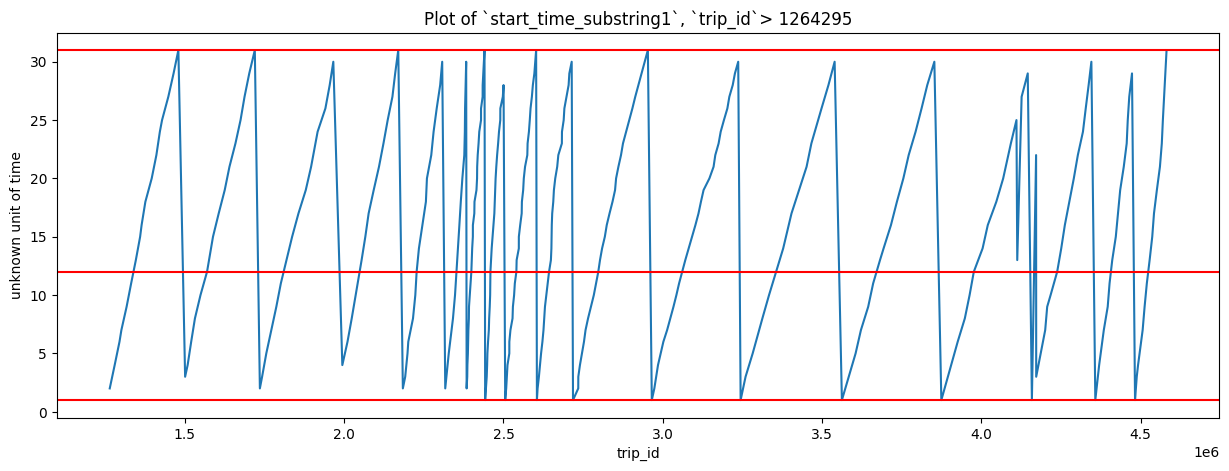

In [17]:
plt.figure(figsize=(15,5))
plt.plot(processed_df2['trip_id'], processed_df2['start_time_substring2'])
plt.axhline(y=31, color='red', label="31")
plt.axhline(y=1, color='red', label="1")
plt.axhline(y=12, color='red', label="1")
plt.title("Plot of `start_time_substring1`, `trip_id`> 1264295")
plt.xlabel("trip_id")
plt.ylabel("unknown unit of time")
plt.show()